# How Did Charles Dickens' Writing Style Change During His Lifetime 

## Mingkang Hui  

2019.8.18  

Introduction to Computational Literary Analysis
UC-Berkeley, Summer 2019
Instructor: Jonathan Reeve




My project is based on famous works of Charles Dickens, I will retrieve his works from corpus.db(project guttenburg) and get the publish dates of those books and sort them by their publishtime. In this way, we could calculate several attributes of each book and arrange them in a time sequence to find out that whether Charles Dickens has changed through the years, and whether his change has some certain kinds of trend, this project may also discover his certain kind of genre during his whole life. I retrieved 20 famous books of Charles Dickens, including prose, stories, novels and even an history book for child. Then I will analysis the type token ratio, readability and other attributes may show how well Charles Dickens has arrange his words. My project also involves some sentiments analysis to find whether the style of writing has changed during Charles Dickens life, and whether there is any trend in his life.  


I had several hypothesis before I started the project. Some of them are just based on people's ideas about Charles Dickens, like people always say that Charles Dickens' work get darker and more miserable when he grew old, so I decided to run some analysis of sentiments for each book to find out whether there is a trend about that.  

And I also get an hypothesis(that is basicaly my guess) that Charles Dickens' works get harder to read for he got mature as an author during his life, and he would tend to use more difficult words and elegant paragraphs, which make it harder to read(in other words, that may demands people who read his works has better educational background).  

My final hypothesis is about his attitude toward material, or in other words, the material world. Some scholars say that Charles Dickens got kind of cynical when he got old and there was a trend that Charles Dickens criticize more about money and higher classes of the society for he started to thought the wealth could lead to miserable life. So I would like to find out that whether there's a trend about that.

## The Coding Part of My Project
Here is the coding part of my project, I got all of my text from corpusDB and filtered the text to make sure I could get the exact book. Then I manually input the publish dates of 20 famous works of Charles Dickens. Then I stored them (for several times in different form) and calculate the type token ratio and readability of each book, finally I run several analysis about the sentiments of each books and gave plots about those attributes.

In [1]:
import spacy

In [2]:
nlp = spacy.load('en_core_web_lg')

In [3]:
import time


In [4]:
import nltk
import collections
import pandas as pd
import requests
import json
import numpy as np
%matplotlib inline
import sklearn # scikit-learn
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
# Import a few new things for 3-D plotting. 
from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib import pyplot as plt
from nltk.corpus import cmudict
from nltk.corpus import sentiwordnet as sw
import pickle


In [5]:
pca=PCA(n_components=2)

In [6]:
pca3=PCA(n_components=3)  #for three dimensional plots

In [7]:
url='http://corpus-db.org/api/author/Dickens, Charles'

In [8]:
response=requests.get(url)

In [9]:
response.ok

True

In [10]:
dickensMeta=json.loads(response.text)

In [11]:
result=[]
for meta in dickensMeta:
    if 'en' in meta['languages']:            # to get the text in English
        result.append(meta)

In [12]:
len(result)

85

In [13]:
ids=[]
for meta in result:
    ids.append(meta['id'])

In [14]:
dickenscorp=[]
original_url="http://corpus-db.org/api/id/"
for i in ids:
    changed_url=original_url+i+'/fulltext'  # we get all of the urls here!!!!
    response=requests.get(changed_url)
    time.sleep(1)
    if response.ok:
        dickenscorp.append(json.loads(response.text))

In [15]:
len(dickenscorp[4])

0

In [16]:
filtered_dickens_corp=[]
for work in dickenscorp:
    if len(work)!=0:
        filtered_dickens_corp.append(work)

In [17]:
len(filtered_dickens_corp)

56

In [18]:
titles=[]
for work in filtered_dickens_corp:
    idt=float(work[0]['id'])
    for info in dickensMeta:
        if float(info['id'])==idt:
            titles.append(info['title'])

In [19]:
len(titles)

56

In [20]:
text='0'
diction={'text':text}


In [21]:
dictionary={"text":filtered_dickens_corp[0][0]['text'],'id':0}

In [22]:
processedtext=[]
for index,text in enumerate(filtered_dickens_corp):
    dictionary={"text":filtered_dickens_corp[index][0]['text'],'title':titles[index]}
    processedtext.append(dictionary)
    
    

Here we finally created our basic corpus!!

Here we input the publish time manually.

In [5]:
for text in processedtext:             #it helps me to filter others out
    text['publishdate']=0
processedtext[0]['publishdate']=1843    
processedtext[1]['publishdate']=1859
processedtext[2]['publishdate']=1870
processedtext[3]['publishdate']=1837    #1836-1837
processedtext[4]['publishdate']=1854    #1852-1854
processedtext[5]['publishdate']=1841    #1840-1841
processedtext[6]['publishdate']=1839    #1837-1839
processedtext[7]['publishdate']=1850    #1849-1850
processedtext[8]['publishdate']=1848    #1846-1848
processedtext[9]['publishdate']=1836
#then no span here
processedtext[10]['publishdate']=1864
processedtext[11]['publishdate']=1841
processedtext[12]['publishdate']=1857
processedtext[13]['publishdate']=1839
processedtext[14]['publishdate']=1844
processedtext[15]['publishdate']=1853
processedtext[16]['publishdate']=1854  #special, maybe a prose, maybe not 1854
#17 missing, weird
processedtext[18]['publishdate']=1861
#19 weird,no wiki, maybe multiple writer
processedtext[20]['publishdate']=1860  #with others
processedtext[21]['publishdate']=1861  #phrase appears in other article
#22 weird
#23 unkown
#end here

# error here is because I accidentally ran it before others for annotations

IndexError: list index out of range

In [24]:
a=0
withDateText=[]
for text in processedtext:
    if text['publishdate']!=0:
        withDateText.append(text)   #filter those I haven't give a publish date

In [25]:
len(withDateText)

20

In [26]:
def typeTokenRatio(tokens):
    return len(set(tokens))/len(tokens)           #set could return type

In [27]:
for text in withDateText:
    text['token']=nltk.word_tokenize(text['text'])
    text['TTR']=typeTokenRatio(text['token'])
    text['sentToken']=nltk.sent_tokenize(text['text'])

In [28]:
for text in withDateText:
    print(text['TTR'])                           #first try of type token ratio, but not accurate because the lenghth is different

0.13186165885949902
0.06682558935498205
0.0928567763124134
0.05057806550698051
0.058224602556563844
0.054057059590459394
0.06273805135766064
0.03967563902387273
0.041831295510793426
0.06306614929542205
0.047240927983374634
0.04950280180092637
0.04468254788734474
0.04490263747890269
0.04636413685387427
0.04096227055318239
0.2044281671383386
0.054764575730837275
0.1613365466032697
0.19454210614431608


In [29]:
newText=withDateText.sort(key=lambda k: (k.get('publishdate', 0)))    #sort all of the books by time

In [30]:
for text in withDateText:
    print(text['publishdate'])   #sanity check to show all of the dates

1836
1837
1839
1839
1841
1841
1843
1844
1848
1850
1853
1854
1854
1857
1859
1860
1861
1861
1864
1870


In [31]:
label=[]
for text in withDateText:
    label.append(text['title'])

In [32]:
clearStatistics=[]
for text in withDateText:
    a={'TTR':text['TTR'],'publishdate':text['publishdate']}
    clearStatistics.append(a)

In [33]:
ndf=pd.DataFrame(clearStatistics,index=label)

In [34]:
df = pd.DataFrame(withDateText,index=label)

In [35]:
rawText=[]
for text in withDateText:
    rawText.append(text['text'])

In [36]:
tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize, max_features=400)

In [37]:
tfMatrix = tfidf.fit_transform(rawText)

In [38]:
segments=[]
seglabel=[]                                    #segmentation of books, for the nlp function demand that the character is lower than 1000000
for text in withDateText:
    if(len(text['text']))>1000000:
        seglabel.append(text['title']+' volume1')
        seglabel.append(text['title']+' volume2')
        segments.append(text['text'][:999998])
        segments.append(text['text'][999999:])
    else:
        seglabel.append(text['title'])
        segments.append(text['text'])

In [39]:
adaptedDocs=[nlp(story) for story in segments]

In [40]:
pca3Out=pca3.fit_transform([story.vector for story in adaptedDocs])            #three demensional PCA

In [41]:
pca3Out.shape

(31, 3)

In [42]:
df=pd.DataFrame(pca3Out,index=seglabel,columns=['C1','C2','C3'])

In [43]:
def plotResults(df, labels):                                                 #function to draw plot
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['C1'], df['C2'], df['C3'], marker='o')
    for i, label in enumerate(labels):
        ax.text(df.iloc[i][0], df.iloc[i][1], df.iloc[i][2], label)

There was a 3D PCA here for sanity check but I canceled it later.

In [45]:
minimum=len(withDateText[0]['token'])
for text in withDateText:
    print(len(text['token']))
    if len(text['token'])<minimum:
        minimum=len(text['token'])

303586
375044
195336
396970
260780
308730
35651
412323
433551
433591
430274
188769
12014
406266
166538
15353
225529
11946
400352
116922


In [46]:
cuttedTokens=[]
for text in withDateText:
    cuttedTokens.append(text['token'][:minimum-2])

In [47]:
tokenR=[]
for text in cuttedTokens:
    print(typeTokenRatio(text))
    tokenR.append(typeTokenRatio(text))

0.22546885465505692
0.24840924313462825
0.2234594775619558
0.23308774279973207
0.19934695244474213
0.2160917615539183
0.2011888814467515
0.23568318821165438
0.20847287340924314
0.19306764902880108
0.22304085733422638
0.1976724715338245
0.20495646349631613
0.21944072337575352
0.21073342263898193
0.18009042196918956
0.18327193569993303
0.19457468184862692
0.22781312793034159
0.22094775619557938


In [48]:
adaptedTTR=[]
for i,text in enumerate(tokenR):
    a={'TTR':text,'publishdate':withDateText[i]['publishdate']}
    adaptedTTR.append(a)

In [49]:
adaptedDf = pd.DataFrame(adaptedTTR, index=label, columns=['TTR', 'publishdate'])

Here I created an adapted TTR(type token ratio) test,letting all of the tested text have a same length.

In [50]:
global cmuDictionary       #it's a dictionary that help to say how many syllabel a word have
cmuDictionary=cmudict.dict()

In [51]:
def syllable_count(word):    #This function is used to count the syllabel of words that is in cmudick
    global cmuDictionary
    d=cmuDictionary
    try:
        syl=[len(list(y for y in x if y[-1].isdigit())) for x in d[word.lower()]][0]
    except:
        syl=syllable_count_backup(word)
    return syl

In [52]:
def syllable_count_backup(word): #This function is used to count the syllabel of words that is not included
    count=0
    word=word.lower()
    vow="aeiouy"
    if word[0]in vow:
        count=count+1
    for index in range(1,len(word)):
        if word[index] in vow and word[index-1] not in vow:
            count=count+1
    if word.endswith('e'):
        count-=1
    if count==0:
        count=1
    return count

In [53]:
def flesch(wordToken,sentToken):
    wordnum=1.0*len(wordToken)
    sentnum=1.0*len(sentToken)
    syllnum=0
    for word in wordToken:
        syllnum+=syllable_count(word)
    rate=206.835-1.015*wordnum/sentnum-84.6*(1.0*syllnum)/wordnum    #both are formula of readability
    level=0.39*wordnum/sentnum+11.8*syllnum/wordnum-15.59
    print(rate,level)
    return(rate,level)

In [54]:
for i,text in enumerate(withDateText):               #here I showed the readability scores and levels for each book in the list
    result=flesch(text['token'],text['sentToken'])
    text['readability_score']=result[0]
    text['readability_level']=result[1]

57.00595222036539 12.621166843136297
68.4645118836346 9.322298948633097
73.91202713314023 8.22131022180682
68.62901422007684 9.667819120904593
70.16423307255037 9.757752569282392
71.66479983097302 9.373392452989577
81.66358661413322 6.422471668392795
73.81312669690674 8.173548503424154
70.2192952567497 9.454477877711188
74.21120102157401 8.395954912046829
74.33484005546283 8.066979647567358
59.44086515373509 13.485680451048271
67.71947526092507 10.505777056811898
71.13815267985218 8.846744737560986
74.38429989869637 8.187041802105629
74.21044624495448 8.696189331747455
75.14009722682422 8.483098730030438
69.13473783246609 9.66065507615226
75.28234650645804 7.6408347995245585
72.46861696621536 8.249108969869479


In [55]:
for text in withDateText:
    print(text['title'],text['readability_score'],text['readability_level'])

Sketches by Boz, Illustrative of Every-Day Life and Every-Day People 57.00595222036539 12.621166843136297
The Pickwick Papers 68.4645118836346 9.322298948633097
Oliver Twist 73.91202713314023 8.22131022180682
Nicholas Nickleby 68.62901422007684 9.667819120904593
The Old Curiosity Shop 70.16423307255037 9.757752569282392
Barnaby Rudge: A Tale of the Riots of 'Eighty 71.66479983097302 9.373392452989577
A Christmas Carol in Prose; Being a Ghost Story of Christmas 81.66358661413322 6.422471668392795
Martin Chuzzlewit 73.81312669690674 8.173548503424154
Dombey and Son 70.2192952567497 9.454477877711188
David Copperfield 74.21120102157401 8.395954912046829
Bleak House 74.33484005546283 8.066979647567358
A Child's History of England 59.44086515373509 13.485680451048271
The Seven Poor Travellers 67.71947526092507 10.505777056811898
Little Dorrit 71.13815267985218 8.846744737560986
A Tale of Two Cities 74.38429989869637 8.187041802105629
A Message from the Sea 74.21044624495448 8.69618933174745

In [56]:
readabilityDF = pd.DataFrame(withDateText,index=label)

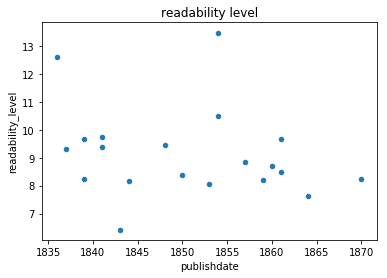

In [57]:
readabilityDF.plot(x='publishdate',y='readability_level',kind='scatter',title='readability level')

Here I calculate and plot the readability of each text.

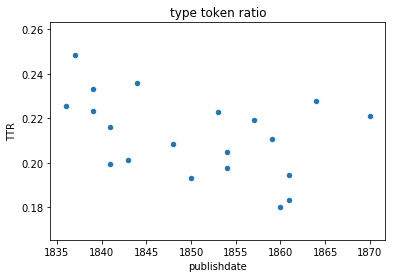

In [58]:
ax = adaptedDf.plot(x='publishdate', y='TTR', kind='scatter',title='type token ratio') #here's a plot for type token ratio and it's like the readability, 
                                                                                       #for it is also declining


In [59]:
oriLabel=[]
for lab in seglabel:
    if lab.endswith("volume1"):
        oriLabel.append(lab[:-8])
    elif lab.endswith("volume2"):
        continue
    else:
        oriLabel.append(lab)

In [60]:
def calsenti(lemmaList):    # an function to calculate the sentiments scores for a set of sentences
    sentScores = []
    for sent in lemmaList: 
        scores = []
        for word, pos in sent: 
            synPos = pos.lower()[0]
            if synPos not in ['a', 'n', 'v']:
                continue
            synsets = list(sw.senti_synsets(word, synPos))
            #print(synsets)
            if (type(synsets) == list) and len(synsets)>0:
                #print('yay!')
                synset = synsets[0]
                score = synset.pos_score() - synset.neg_score()
                scores.append(score)
        if len(scores)>0: 
            avgScores = sum(scores) / len(scores)
            sentScores.append(avgScores)
    return sentScores

In [61]:
chapterScores=[]                                              #calculate the sentiments scores and variance for each book
chapterVariance=[]
for i,text in enumerate(adaptedDocs):
    print(seglabel[i])#to show
    lemmaList = []
    for sent in text.sents: 
        sentLemmaList = []
        for w in sent: 
            if (not w.is_stop) and (not w.is_punct) and (not w.is_space) and (w.pos_ is not 'PROPN'): 
                sentLemmaList.append((w.lemma_, w.pos_))
        lemmaList.append(sentLemmaList)
    sentScores = []
    sentScores=calsenti(lemmaList)
    if len(sentScores)>0:
        avgSentScores=sum(sentScores)/len(sentScores)
        chapterScores.append(avgSentScores)
        temp=0
        for x in sentScores:
            temp+=(x-avgSentScores)*(x-avgSentScores)
        varianceSentScores=temp/len(sentScores)
        chapterVariance.append(varianceSentScores)

Sketches by Boz, Illustrative of Every-Day Life and Every-Day People volume1
Sketches by Boz, Illustrative of Every-Day Life and Every-Day People volume2
The Pickwick Papers volume1
The Pickwick Papers volume2
Oliver Twist
Nicholas Nickleby volume1
Nicholas Nickleby volume2
The Old Curiosity Shop volume1
The Old Curiosity Shop volume2
Barnaby Rudge: A Tale of the Riots of 'Eighty volume1
Barnaby Rudge: A Tale of the Riots of 'Eighty volume2
A Christmas Carol in Prose; Being a Ghost Story of Christmas
Martin Chuzzlewit volume1
Martin Chuzzlewit volume2
Dombey and Son volume1
Dombey and Son volume2
David Copperfield volume1
David Copperfield volume2
Bleak House volume1
Bleak House volume2
A Child's History of England
The Seven Poor Travellers
Little Dorrit volume1
Little Dorrit volume2
A Tale of Two Cities
A Message from the Sea
Great Expectations
Tom Tiddler's Ground
Our Mutual Friend volume1
Our Mutual Friend volume2
The Mystery of Edwin Drood


In [62]:
materialScores=[]                                #calculate the author's attitude to each book
materialWords=['money','cash','coin','house','business','wealth','merchant','treasure','possesion','power']
for i,text in enumerate(adaptedDocs):
    lemmaList = []
    for sent in text.sents: 
        sentLemmaList = []
        for x in sent:
            if x.lemma_ in materialWords:
                for w in sent: 
                    if (not w.is_stop) and (not w.is_punct) and (not w.is_space) and (w.pos_ is not 'PROPN'): 
                        sentLemmaList.append((w.lemma_, w.pos_))
                continue
        lemmaList.append(sentLemmaList)
    sentScores = []
    sentScores=calsenti(lemmaList)
    if len(sentScores)>0:
        avgSentScores=sum(sentScores)/len(sentScores)
        materialScores.append(avgSentScores)
    print(seglabel[i],avgSentScores)#to show

Sketches by Boz, Illustrative of Every-Day Life and Every-Day People volume1 0.0036503389091866404
Sketches by Boz, Illustrative of Every-Day Life and Every-Day People volume2 0.01964703225029911
The Pickwick Papers volume1 0.011458765147910159
The Pickwick Papers volume2 0.01542032619280133
Oliver Twist 0.0032293607158141147
Nicholas Nickleby volume1 0.013484271875992417
Nicholas Nickleby volume2 0.004668585287810624
The Old Curiosity Shop volume1 0.006887235611753066
The Old Curiosity Shop volume2 0.018350816325201774
Barnaby Rudge: A Tale of the Riots of 'Eighty volume1 0.003030318438765262
Barnaby Rudge: A Tale of the Riots of 'Eighty volume2 0.012285172246859766
A Christmas Carol in Prose; Being a Ghost Story of Christmas 0.006951230659389607
Martin Chuzzlewit volume1 0.01211595878976506
Martin Chuzzlewit volume2 0.003951375987972047
Dombey and Son volume1 0.009389551576357893
Dombey and Son volume2 0.003264859256179905
David Copperfield volume1 0.006738691966190028
David Copperfi

In [63]:
wholeChapterScores=[]                                    #adding the segments back to the book
wholeChapterVariance=[]
wholeMaterialScores=[]
for i,lab in enumerate(seglabel):
    if lab.endswith('volume1'):
        wholeChapterScores.append((chapterScores[i]+chapterScores[i+1])/2)
        wholeChapterVariance.append((chapterVariance[i]+chapterVariance[i+1])/2)
        wholeMaterialScores.append((materialScores[i]+materialScores[i+1])/2)
    elif lab.endswith('volume2'):
        continue
    else:
        wholeChapterScores.append(chapterScores[i])
        wholeChapterVariance.append(chapterVariance[i])
        wholeMaterialScores.append(materialScores[i])

In [64]:
relativeMaterialScores=[]
for i,score in enumerate(wholeMaterialScores): 
    relativeMaterialScores.append(score-wholeChapterScores[i])

In [65]:
beginScores=[]                                                #calculating whether the story has a good end
endScores=[]
differenceScores=[]
for i,text in enumerate(adaptedDocs):
    print(seglabel[i])#to show
    lemmaList1 = []
    lemmaList2 = []
    if seglabel[i].endswith('volume1'):
        for sent in list(text.sents)[:50]:   #list
            sentLemmaList = []
            for w in sent: 
                if (not w.is_stop) and (not w.is_punct) and (not w.is_space) and (w.pos_ is not 'PROPN'): 
                    sentLemmaList.append((w.lemma_, w.pos_))
            lemmaList1.append(sentLemmaList)
        for sent in list(adaptedDocs[i+1].sents)[-50:]:
            sentLemmaList = []
            for w in sent: 
                if (not w.is_stop) and (not w.is_punct) and (not w.is_space) and (w.pos_ is not 'PROPN'): 
                    sentLemmaList.append((w.lemma_, w.pos_))
            lemmaList2.append(sentLemmaList)
    elif seglabel[i].endswith('volume2'):
        continue
    else:
        for sent in list(text.sents)[:50]: 
            sentLemmaList = []
            for w in sent: 
                if (not w.is_stop) and (not w.is_punct) and (not w.is_space) and (w.pos_ is not 'PROPN'): 
                    sentLemmaList.append((w.lemma_, w.pos_))
            lemmaList1.append(sentLemmaList)
        for sent in list(text.sents)[-50:]:
            sentLemmaList = []
            for w in sent: 
                if (not w.is_stop) and (not w.is_punct) and (not w.is_space) and (w.pos_ is not 'PROPN'): 
                    sentLemmaList.append((w.lemma_, w.pos_))
            lemmaList2.append(sentLemmaList)        
        
        
    sentScoresOne = []
    sentScoresTwo = []
    sentScoresOne=calsenti(lemmaList1)
    sentScoresTwo=calsenti(lemmaList2)
    if len(sentScoresOne)>0 and len(sentScoresTwo)>0:
        beginScores.append(sum(sentScoresOne)/len(sentScoresOne))
        endScores.append(sum(sentScoresTwo)/len(sentScoresTwo))
        differenceScores.append(sum(sentScoresOne)/len(sentScoresOne)-sum(sentScoresTwo)/len(sentScoresTwo))

Sketches by Boz, Illustrative of Every-Day Life and Every-Day People volume1
Sketches by Boz, Illustrative of Every-Day Life and Every-Day People volume2
The Pickwick Papers volume1
The Pickwick Papers volume2
Oliver Twist
Nicholas Nickleby volume1
Nicholas Nickleby volume2
The Old Curiosity Shop volume1
The Old Curiosity Shop volume2
Barnaby Rudge: A Tale of the Riots of 'Eighty volume1
Barnaby Rudge: A Tale of the Riots of 'Eighty volume2
A Christmas Carol in Prose; Being a Ghost Story of Christmas
Martin Chuzzlewit volume1
Martin Chuzzlewit volume2
Dombey and Son volume1
Dombey and Son volume2
David Copperfield volume1
David Copperfield volume2
Bleak House volume1
Bleak House volume2
A Child's History of England
The Seven Poor Travellers
Little Dorrit volume1
Little Dorrit volume2
A Tale of Two Cities
A Message from the Sea
Great Expectations
Tom Tiddler's Ground
Our Mutual Friend volume1
Our Mutual Friend volume2
The Mystery of Edwin Drood


I calculated some variables about the sentimens and finally got my plots here.

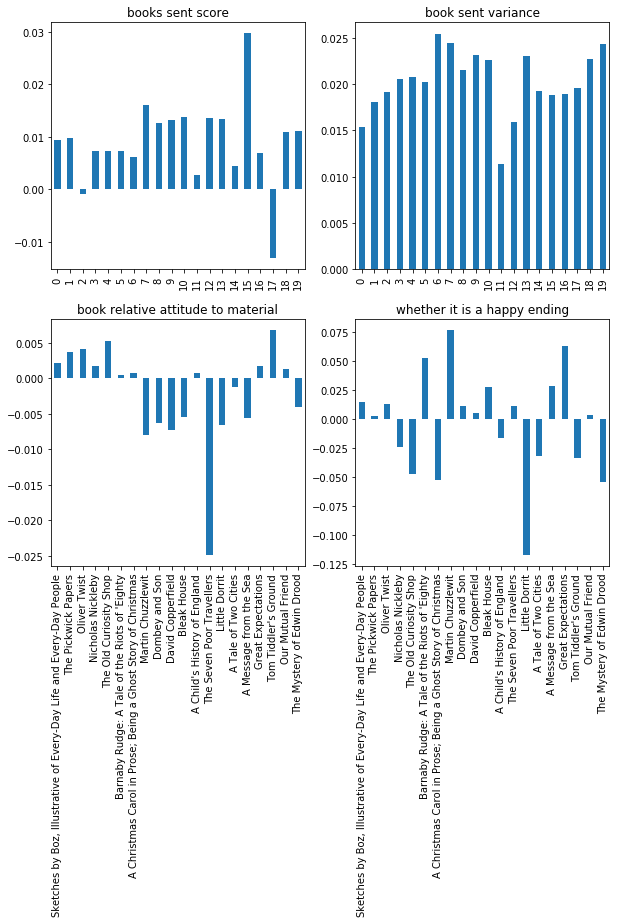

In [66]:
plt.subplot(2,2,1)                              #drawing our plots
pd.Series(wholeChapterScores).plot(kind='bar',figsize=(10,10),title='books sent score')
plt.subplot(2,2,2)
pd.Series(wholeChapterVariance).plot(kind='bar',title='book sent variance')
plt.subplot(2,2,3)# "money, money, money, and what money can make of life."
pd.Series(relativeMaterialScores,index=oriLabel).plot(kind='bar',title='book relative attitude to material')
plt.subplot(2,2,4)
pd.Series(differenceScores,index=oriLabel).plot(kind='bar',title='whether it is a happy ending')
plt.show()

## Readability Test of Each Books
My test about the readability of each work actually give me a really good result. I choose to use Flesch-Kincaid grading standard to calculate whether his book is hard to read, the grading level itself might shows how hard the text is. This method was designed in 1943 and was widely accepted by scholars. The higher the level is(and the lower the flesch readability score is), the harder the text is. The formula and basic concept of Flesch's system is kind of easy to understand. It only include the average sentence length and average word length in syllabel to calculate the scores of readability, and the calculation of readability level is quite the same. Here's the formula of the readability score:  
Reading Ease score = 206.835 − (1.015 × ASL) − (84.6 × ASW)  
Readability Grade Level= 0.39*ASL+ 11.8*ASW -15.59  
ASL = average sentence length (number of words divided by number of sentences)  
ASW = average word length in syllables (number of syllables divided by number of words)  

And the result turns out that Charles Dickens' works actually has a declining trend in the readability levels. The lower the readability level is, the easier the text is, so Charles Dickens' works actually got easier to read in his life time. There is and exception, which has the highest readability level among all of the books, this one was written when Charles Dickens was in his midlife, and this book is called _A Child's History of England_, it is really interesting because the least readable book among all of Charles' works is a book written for children. But this also make sense because this could also explain why Charles Dickens's works so popular in England. For _A Child's History of England_ is a book about British history, so it will inevitably include the words about history, which maybe longer in syllabels and could be really hard to read. And most of his books are novels and stories, even though these book are for adults, but they are still easier to read than the history book for children, that make Charles Dickens novels kind of like pulp fictions compared with his history book but that also make his works could be read by every class in British society, and Charles Dickens is famous for depicting people's life vividly and himself didn't get really much formal education when he was young, all of these makes Charles Dickens wrote his novels in plain and straightforward words and people liked him for that. And the _A Child's History of England_ is still a good book because it is easier to read than other history book, like _the History of Decline and Fall of the Roman Empire_ written by Edward Gibbon.  







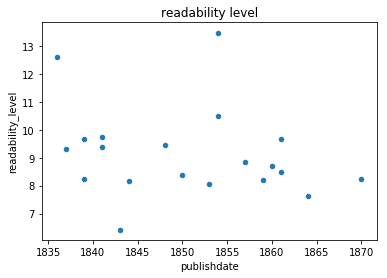

In [57]:
readabilityDF.plot(x='publishdate',y='readability_level',kind='scatter',title='readability level')

Here I get an example about the text in the _A child's history of England_ _"It seems to have been brought over, in very early times indeed, from the opposite country of France, anciently called Gaul, and to have mixed up the worship of the Serpent, and of the Sun and Moon, with the worship of some of the Heathen Gods and Goddesses"_, the sentences is really long even the author used many commas, it's like that Charles Dickens wrote a story for kids but he didn't really now where to stop the sentences. And some weird words must be used in those sentences to explain the events in history. These reasons might cause the low readability of this book compared with other works.

The first of his work, the _Sketches by Boz_, has an abnormally high readability level, this could also explain why Charles Dickens changed his style to let his works easier to read in some degree. For even though he received much attention from people after the publish of _Sketches by Boz_, his first book, Dickens's literary success began with the 1836 serial publication of _The Pickwick Papers_(it was Dickens' second work in his life), which is far more easier to read than the _Sketches by Boz_, but we also need to remember that the _Sketches by Boz_ is a prose and Charles Dickens has included many of his ideas and personal thoughts about this country so it is normal that it have higher readability level than other works.

## Sentiments analysis about all of the works  
I also run several sentiments analysis to find out whether Charles Dickens works get sadder through his age, and the result is shown in the plot whose name is _book sent score_, I calculate the sentiment scores(could show whether the emotion in this text is positive) and get the average value of them for each sentence and each book, and the result shows that the sentiments scores of Dickens' book is kind of following a normal kind distribution, for his work get higher sentiment scores in his middle age and is a little bit sadder in his early and late years. And this plot could also explain why people think Charles Dickens work is sad, for his work is way sadder than other people's. For there is an exception which has it index as 15, this book is the _A Message from the Sea_, written by Charles Dickens, Wilkie Collins, Robert Buchanan, Charles Allston Collins, Amelia Edwards, and Harriet Parr. It was written in 1860 for the Christmas issue of All the Year Round. This indicates that cooperating with other writers may drastically increase Dickens' work's sentiments scores, this could shows that Charles Dickens work is sadder than other writer, for example, Wilkie Collins. And some authors(like Oscar Wilde) at Charles' time even criticized Charles for his sentimentalism.  

I also tried to figure out a way to quantify the changes of emotion in Charles Dickens works. The way of doing so is to get the variance of sentiment scores of each sentence in the whole books. If the variance is big, it means that the emotion in different sentences vary from each other, so this will show that the emotions are drastically changed in this book. This could also indicate that there are more conflicts in this book. There are two exceptions in this plot, which is _the Child's History of England_ and _Seven Poor Travelers_, one of them is a history book and the other is mainly about criticizing British colonization policy, it makes sense that there will be less emotion changes in these books. If we don't include two exceptions in the plot, we could see that the variance of sentiments scores is actually rising, so this shows that as Charles Dickens got mature as an author, his works actually have more conflicts and more changes in emotion. There is a certain kind of plots that Charles really like to use called the cliffhanger, he used these to set more suspense to stories and call the attention of readers and make them continue to purchase the latter chapters of the book. Those cliffhangers are basically great changes in the book, it ends each chapter with ambiguity, so when the latter chapters are published, the emotion of the story will get back to normal and will be changed again when other great changes happens, maybe the use of cliffhangers explain the high variance of sentiments scores in Charles' works. The increasing variance in emotions also makes Charles' works more popular among the readers.

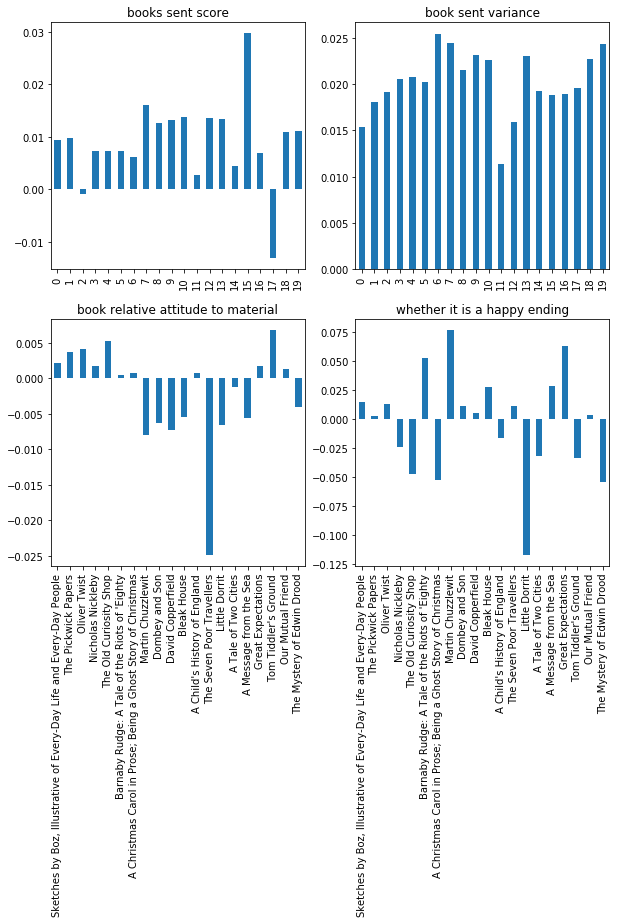

In [66]:
plt.subplot(2,2,1)
pd.Series(wholeChapterScores).plot(kind='bar',figsize=(10,10),title='books sent score')
plt.subplot(2,2,2)
pd.Series(wholeChapterVariance).plot(kind='bar',title='book sent variance')
plt.subplot(2,2,3)# "money, money, money, and what money can make of life."
pd.Series(relativeMaterialScores,index=oriLabel).plot(kind='bar',title='book relative attitude to material')
plt.subplot(2,2,4)
pd.Series(differenceScores,index=oriLabel).plot(kind='bar',title='whether it is a happy ending')
plt.show()

The part I loved the most is my test about Charles' relative attitude toward material world. I set this standard by myself and it really showed something interesting. At first, for each book, I calculate the average sentiments scores of sentences which contained words in a material word set. The material words set is designed by myself, it contained words about the material and money, which could indicate the material world. Then I use these absolute material scores to minus the average book sentiments scores to get the relative attitude's to material. I did so because I wanted cancel the influence of the total genre of the book to only see the author's attitude toward these words(if the whole book is sad, of course the sentences containing material words is also kind of sad). And the result really means something to me, it shows a period of time when Charles Dickens was really cynical about money, scholars name a genre _the Hard Time_ genre. _The Hard Time_ is a book of Charles Dickens, and it is also a genre. And many his other book also has this hard time genre. In that time, Dickens moved into Tavistock House where he wrote Bleak House (1852–53), Hard Times (1854), and Little Dorrit (1856), and the book _the Seven Poor Travelers_ was also written near that time. This genre really showed Charles Dickens' criticism and sarcasism toward the material life in the Victorian Era.He was a fierce critic of the poverty and social stratification of Victorian society, and his most strident indictment of this condition is in Hard Times. From then, he started to argue that wealth could bring people miserable lives, and others, like Karl Marx asserted that Dickens "issued to the world more political and social truths than have been uttered by all the professional politicians, publicists and moralists put together", this also shows that his hatred to material world and people in higher social class who are exploiting labors, in those books, Charles Dickens was also indicated that " the heavy burden on the poor who were forced by circumstances to "go to law"." is really a problem at that time.

The last picture, a picture which could tell whether a story has a good end, was gave out by calculating the difference the sentiments scores of the final parts of the book and the starting parts, it turns out that Charles Dickens tended to wrote the bad ends and good ends in turns, and the result of _the Little Dorrit_ also explained Charles Dickens criticism toward material, for in the last part of the book, the Dorrit's family got extremely rich but also suffered from the wealth they got, so it makes _the Little Dorrit_ the book with the worst ending.

In conclusion, I found out that most of my hypothesis are not exactly what the truth is, Charles Dickens works is not exactly getting sadder when he got old, it seems follow a kind of normal distribution, he actually got more positive in his middle age. Charles Dickens' works were getting easier to read when he got old and he had a really passive attitude toward material in his middle age comparing to other periods of time in his life, and the genre continued until he got old.